In [39]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numba import njit
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


lightcone 0 0.0692667406986289 0.0106927399700134 0.1682769161224142
lightcone 1 0.0714951837401778 0.0059032567886303 0.1936147369636354
Observed 0.0747999996 0.00360000017 0.446999997
lightcone 0 1.0864349216064278e+44 1.7582442857981833e+42 1.984930213113269e+45
lightcone 1 1.2018597906922295e+44 2.422131675574635e+42 9.462896604893382e+44
Observed 1.4690480200000001e+44 1.1470999600000001e+42 3.5139999400000004e+45
lightcone 0 3.292464792828659 0.8584127312406152 11.498212981573998
lightcone 1 3.3150542568523917 0.7066374539242235 8.47117826882186
Observed 4.51599979 0.825999975 100.30569148


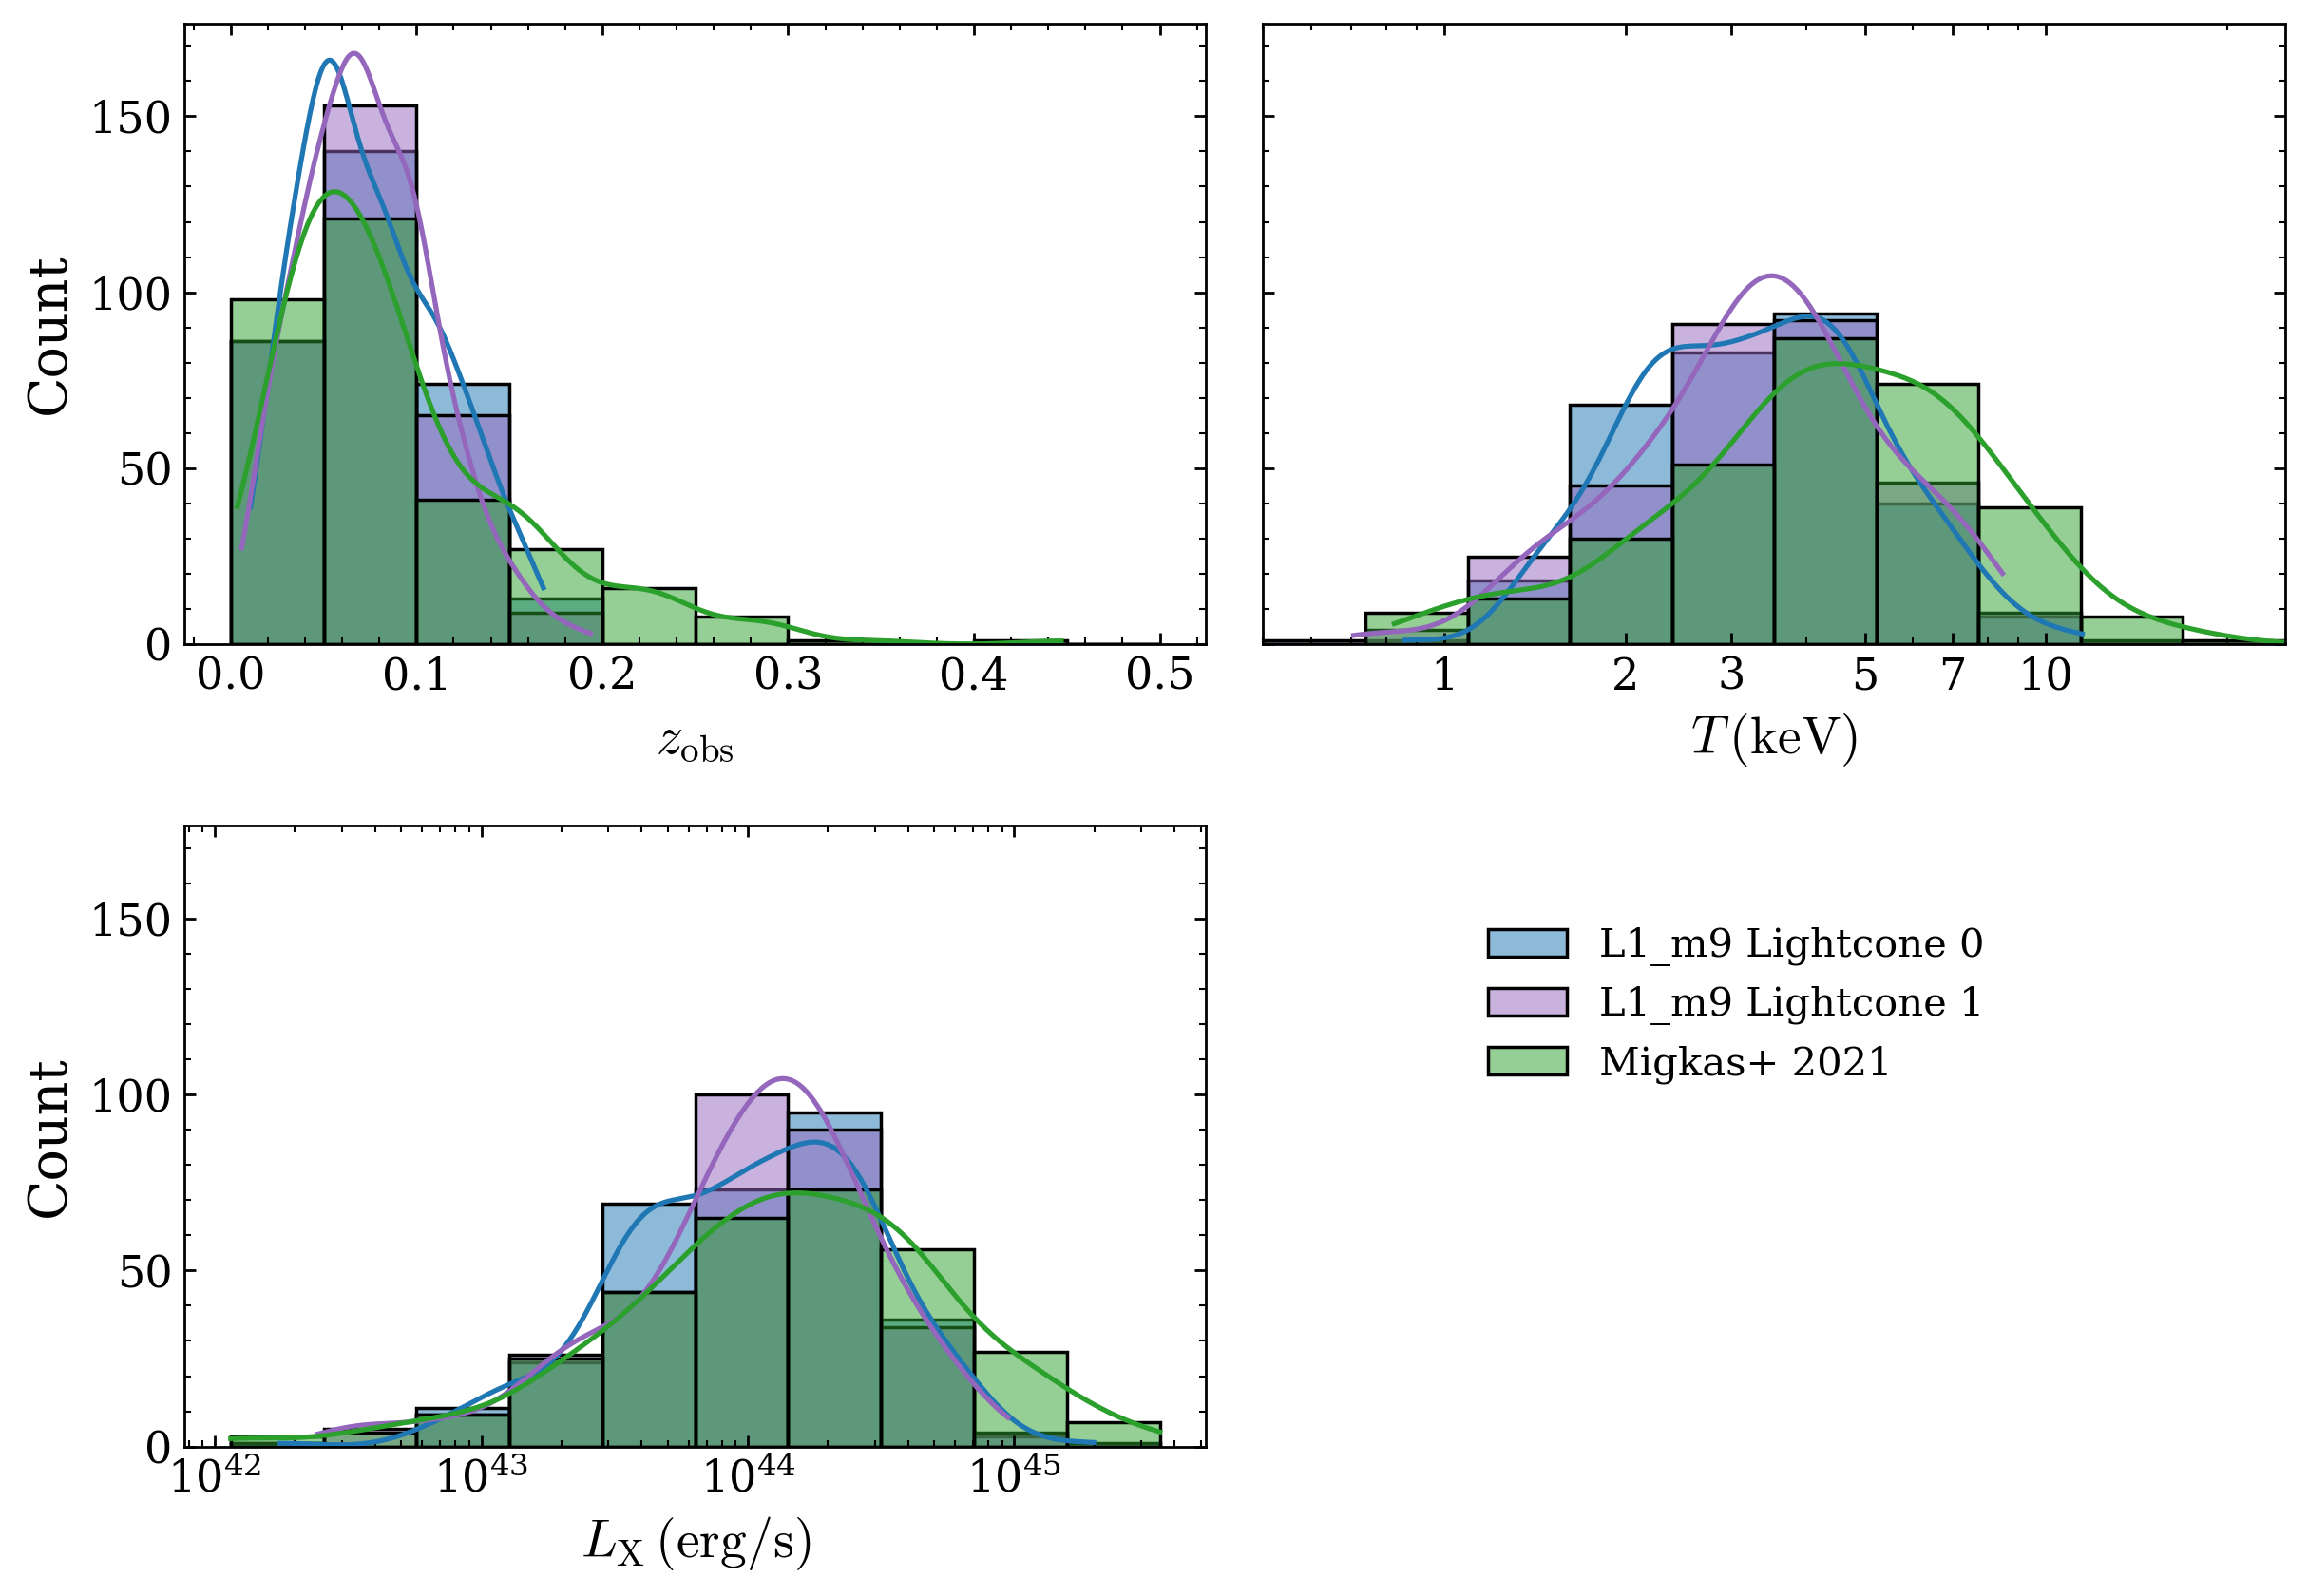

In [32]:
import sys
sys.path.append('../tools/')
import clusterplot as cp
import clusterfit as cf
import matplotlib.pyplot as plt
import seaborn as sns

lc = 0
n_clusters = 313
element = 'bars'
kde = True
# Load the observation data
obs_data = pd.read_csv('../data/obs-properties.csv')

# Select color
lc_colors = ['tab:blue', 'tab:purple']
obs_color = 'tab:green'

fig, axs = plt.subplots(2, 2, figsize=(10, 7), dpi=250, sharey=True)

# Plot redshift distribution
for lc in range(2):
    # Load the lightcone data
    data = pd.read_csv(f'../data/samples_in_lightcone{lc}_with_trees_duplicate_excision_outlier_excision.csv')
    # Only 313 highest Lcore/Ltot clusters
    data = data[:n_clusters]

    # Print the numbers
    z = data["ObservedRedshift"]
    print(f'lightcone {lc}', np.median(z), np.min(z), np.max(z))

    sns.histplot(z, bins=10, binrange=[0., 0.5], ax=axs[0,0], kde=kde, color=lc_colors[lc], element=element)
    axs[0,0].set_xlabel("$z_\\mathrm{{obs}}$")
    axs[0,0].set_ylabel("Count")

# Observation
z = obs_data["z"]
print('Observed', np.median(z), np.min(z), np.max(z)) 
sns.histplot(z, bins=10, binrange=[0., 0.5], ax=axs[0,0], kde=kde, color=obs_color, element=element)


# Plot Lx
binmin = np.min(obs_data["Lx(1e44)"]*1e44)
binmax = np.max(obs_data["Lx(1e44)"]*1e44)
binrange = [np.log10(binmin), np.log10(binmax)]
for lc in range(2):
    # Load the lightcone data
    data = pd.read_csv(f'../data/samples_in_lightcone{lc}_with_trees_duplicate_excision_outlier_excision.csv')
    # Only 313 highest Lcore/Ltot clusters
    data = data[:n_clusters]

    # Show the numbers 
    Lx = data[cf.COLUMNS['LX']]
    print(f'lightcone {lc}', np.median(Lx), np.min(Lx), np.max(Lx))

    sns.histplot(Lx, bins=10, ax=axs[1,0], binrange=binrange, label=f'L1_m9 Lightcone {lc}', log_scale=True, kde=kde, color=lc_colors[lc], element=element)
    axs[1,0].set_xlabel("$L_\\mathrm{{X}}\\,\\mathrm{{(erg/s)}}$")
    # axs[1].set_ylabel("Counts")

# The observed quantities
Lx = obs_data["Lx(1e44)"]*1e44
print('Observed', np.median(Lx), np.min(Lx), np.max(Lx))
sns.histplot(Lx, bins=10, ax=axs[1,0], binrange=binrange, label='Migkas+ 2021', log_scale=True, kde=kde, color=obs_color, element=element)



# Plot Temperature
binmin = 0.5 # np.min(obs_data['T(keV)'])
binmax = 25 # np.max(obs_data['T(keV)'])
binrange = [np.log10(binmin), np.log10(binmax)]
for lc in range(2):
    # Load the lightcone data
    data = pd.read_csv(f'../data/samples_in_lightcone{lc}_with_trees_duplicate_excision_outlier_excision.csv')
    # Only 313 highest Lcore/Ltot clusters
    data = data[:n_clusters]

    # Show the numbers 
    T = data[cf.COLUMNS['T']]
    print(f'lightcone {lc}', np.median(T), np.min(T), np.max(T))

    sns.histplot(T, bins=10, ax=axs[0,1], binrange=binrange, label=f'L1_m9 Lightcone {lc}', log_scale=True, kde=kde, color=lc_colors[lc], element=element)
    axs[0,1].set_xlabel("$T\\,\\mathrm{{(keV)}}$")
    axs[0,1].set_ylabel("Count")

# The observed quantities
T = obs_data["T(keV)"]
print('Observed', np.median(T), np.min(T), np.max(T))
sns.histplot(T, bins=10, ax=axs[0,1], binrange=binrange, label='Migkas+ 2021', log_scale=True, kde=kde, color=obs_color, element=element)

axs[0,1].set_xlim(binmin, binmax)
axs[0,1].set_xticks(ticks=[1, 2, 3, 5, 7, 10],
   labels=['1','2','3','5','7','10'])

fig.delaxes(axs[1,1])

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.8, 0.9))

# plt.savefig(f'/Users/yujiehe/Documents/projects/project-anisotropy/plots/forpaper/sample-z-LX-T.pdf', bbox_inches='tight')
plt.show()

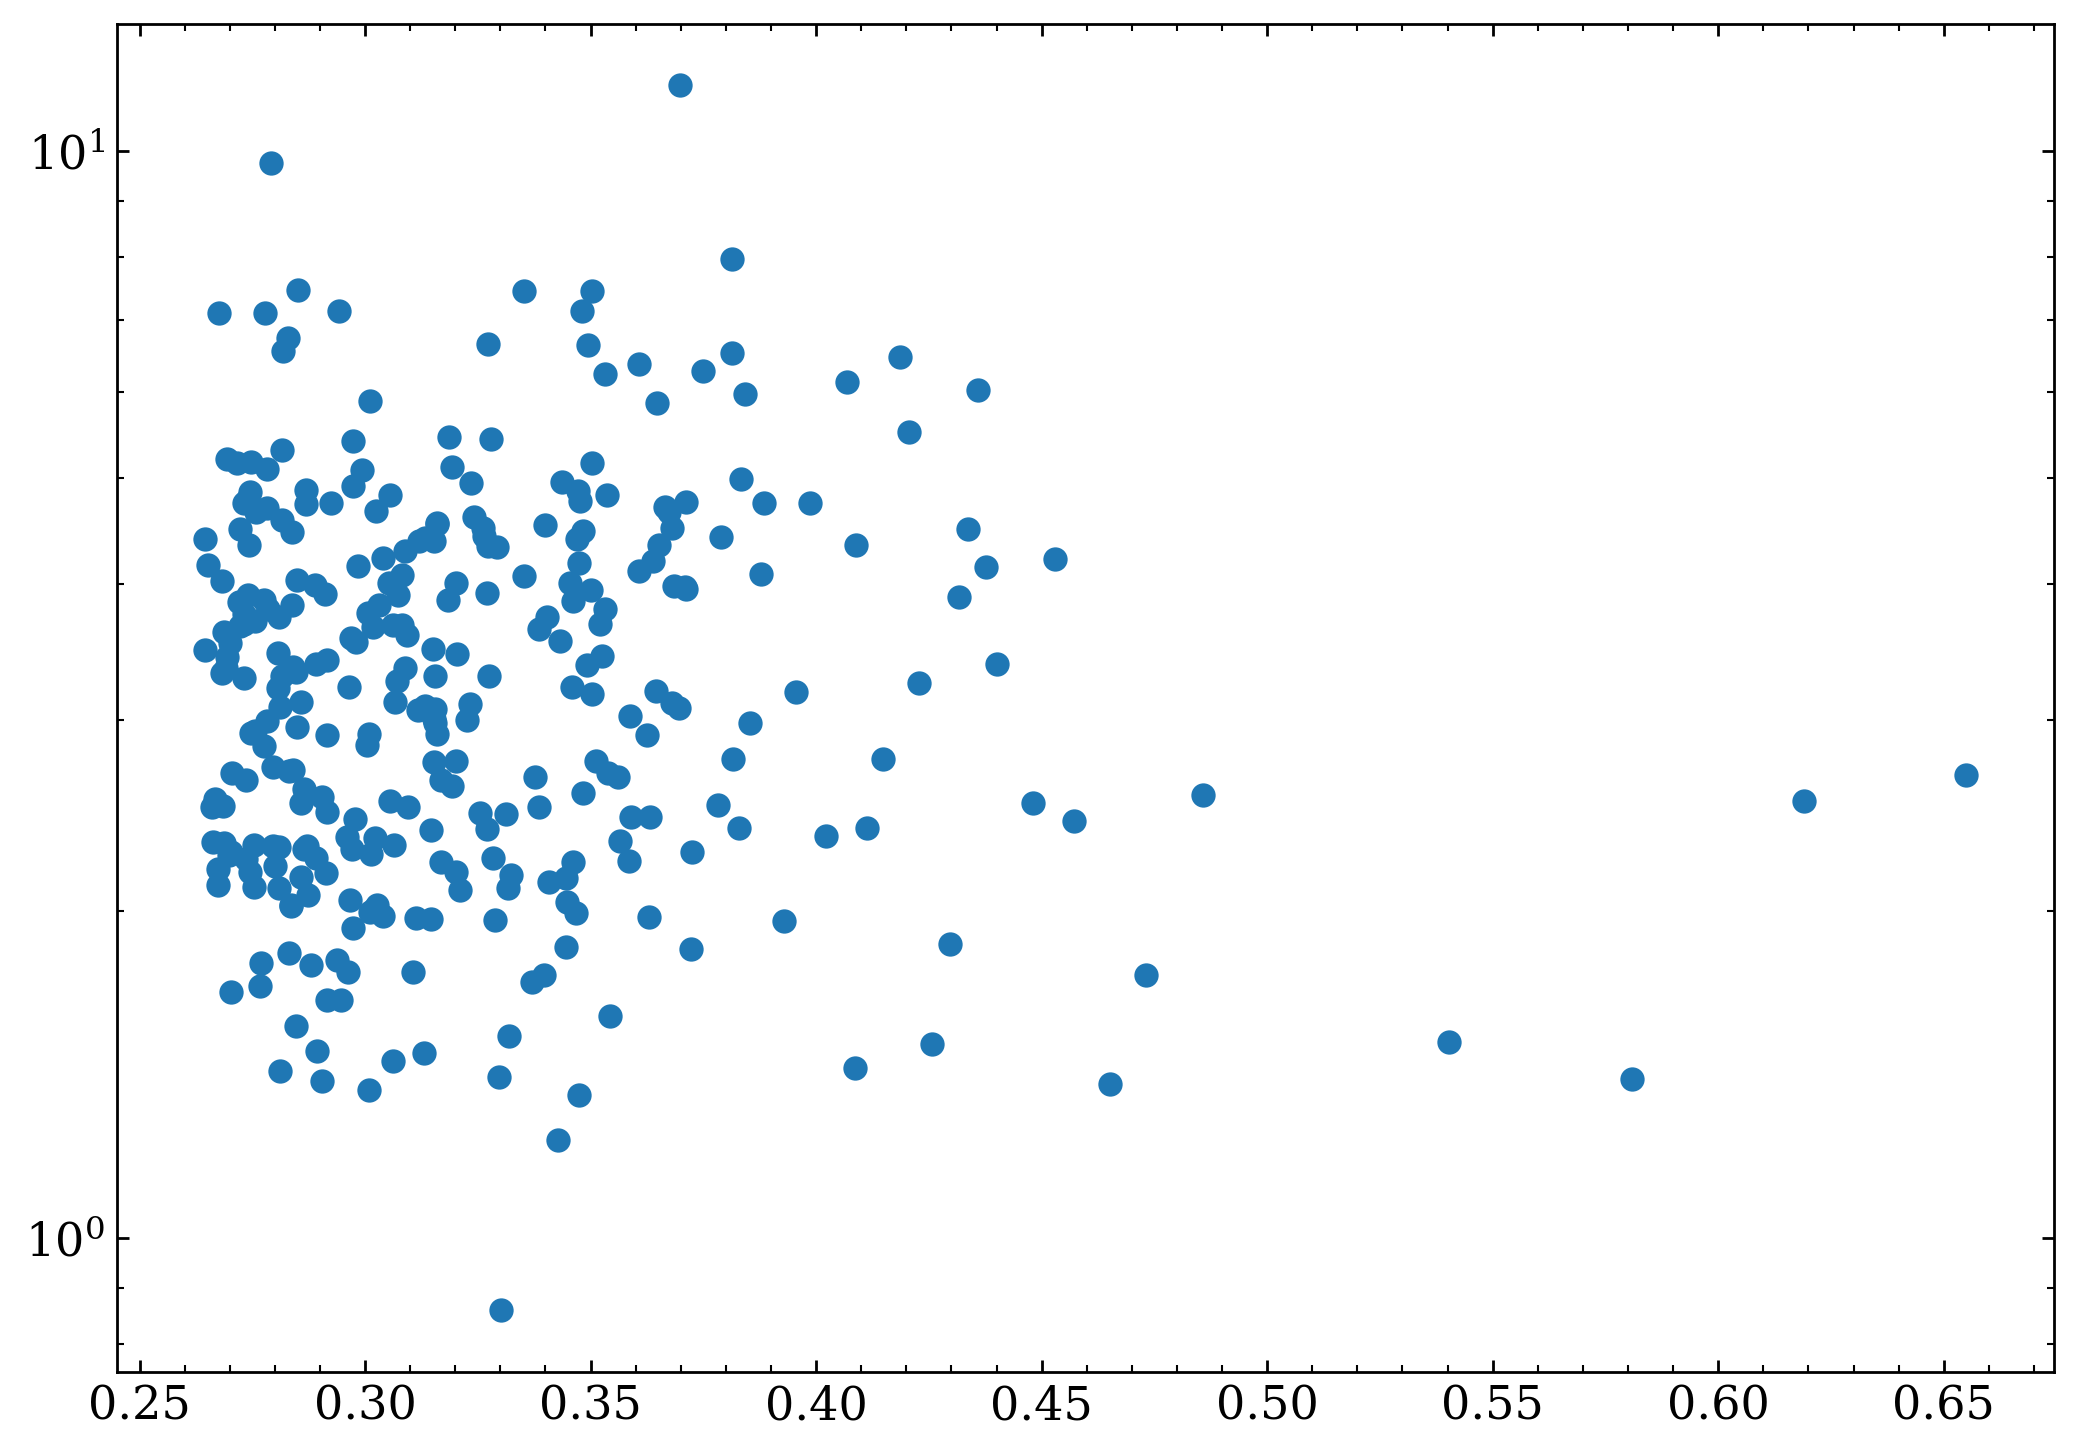

In [46]:
import sys
sys.path.append('../tools/')
import clusterplot as cp
import clusterfit as cf
import matplotlib.pyplot as plt
import seaborn as sns

lc = 0
n_clusters = 313
element = 'bars'
kde = True


fig, ax = plt.subplots(1, 1, figsize=(10, 7), dpi=250, sharey=True)


# Load the lightcone data
data = pd.read_csv(f'../data/samples_in_lightcone{lc}_with_trees_duplicate_excision_outlier_excision.csv')
# Only 313 highest Lcore/Ltot clusters
data = data[:n_clusters]

plt.scatter(data['2DLcore/Ltot'], data[cf.COLUMNS['T']])
# axs.set_xlabel("$z_\\mathrm{{obs}}$")
# axs.set_ylabel("Count")
ax.set_yscale('log')

plt.show()

## Keeping duplicates??

lightcone 0 0.0770755955560558 0.0106927399700134 0.2880947028854264
lightcone 1 0.0760052864043536 0.0059032567886303 0.2798473766089004
Observed 0.0747999996 0.00360000017 0.446999997
lightcone 0 1.3112297189271531e+44 1.7582442857981833e+42 5.600401962713392e+45
lightcone 1 1.364635091248124e+44 8.262614878692887e+41 5.3183661507990845e+45
Observed 1.4690480200000001e+44 1.1470999600000001e+42 3.5139999400000004e+45
lightcone 0 3.292464792828659 0.8584127312406152 11.498212981573998
lightcone 1 3.3150542568523917 0.7066374539242235 8.47117826882186
Observed 4.51599979 0.825999975 100.30569148


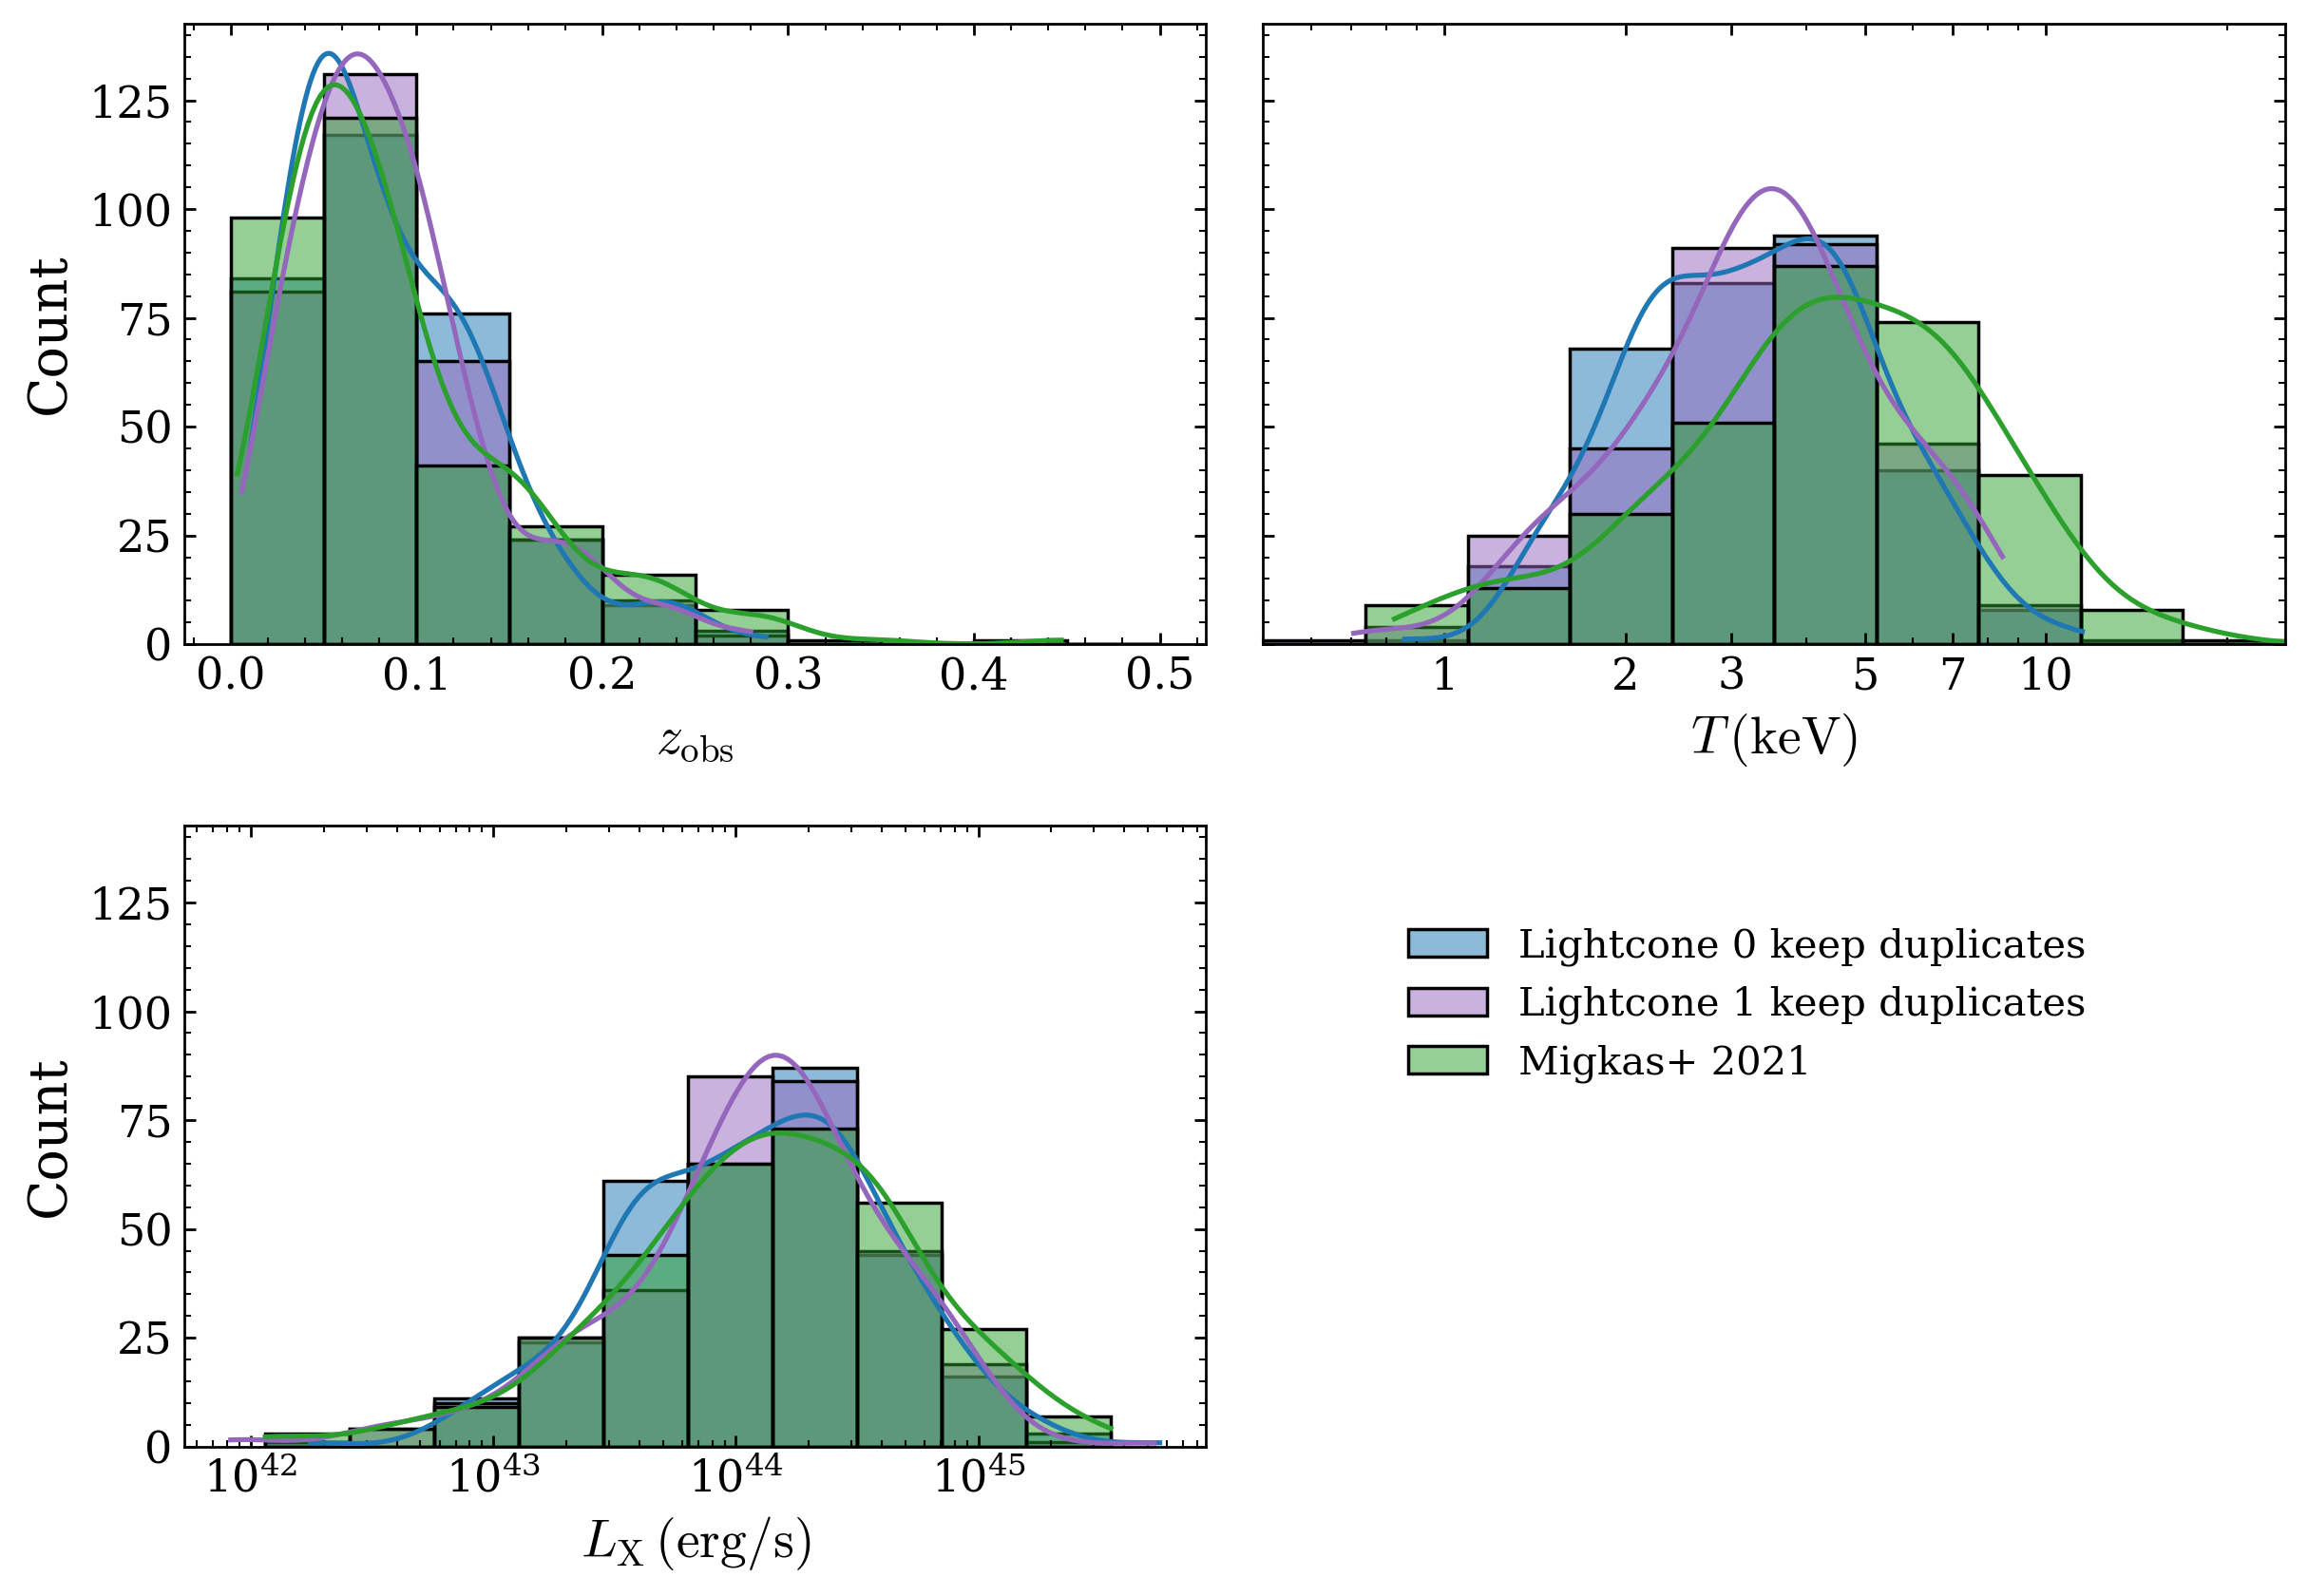

In [41]:
import sys
sys.path.append('../tools/')
import clusterplot as cp
import clusterfit as cf
import matplotlib.pyplot as plt
import seaborn as sns

lc = 0
n_clusters = 313
element = 'bars'
kde = True
# Load the observation data
obs_data = pd.read_csv('../data/obs-properties.csv')

# Select color
lc_colors = ['tab:blue', 'tab:purple']
obs_color = 'tab:green'

fig, axs = plt.subplots(2, 2, figsize=(10, 7), dpi=250, sharey=True)

# Plot redshift distribution
for lc in range(2):
    # Load the lightcone data
    data = pd.read_csv(f'../data/samples_in_lightcone{lc}.csv')
    # Only 313 highest Lcore/Ltot clusters
    data = data[:n_clusters]

    # Print the numbers
    z = data["ObservedRedshift"]
    print(f'lightcone {lc}', np.median(z), np.min(z), np.max(z))

    sns.histplot(z, bins=10, binrange=[0., 0.5], ax=axs[0,0], kde=kde, color=lc_colors[lc], element=element)
    axs[0,0].set_xlabel("$z_\\mathrm{{obs}}$")
    axs[0,0].set_ylabel("Count")

# Observation
z = obs_data["z"]
print('Observed', np.median(z), np.min(z), np.max(z)) 
sns.histplot(z, bins=10, binrange=[0., 0.5], ax=axs[0,0], kde=kde, color=obs_color, element=element)


# Plot Lx
binmin = np.min(obs_data["Lx(1e44)"]*1e44)
binmax = np.max(obs_data["Lx(1e44)"]*1e44)
binrange = [np.log10(binmin), np.log10(binmax)]
for lc in range(2):
    # Load the lightcone data
    data = pd.read_csv(f'../data/samples_in_lightcone{lc}.csv')
    # Only 313 highest Lcore/Ltot clusters
    data = data[:n_clusters]

    # Show the numbers 
    Lx = data[cf.COLUMNS['LX']]
    print(f'lightcone {lc}', np.median(Lx), np.min(Lx), np.max(Lx))

    sns.histplot(Lx, bins=10, ax=axs[1,0], binrange=binrange, label=f'Lightcone {lc} keep duplicates', log_scale=True, kde=kde, color=lc_colors[lc], element=element)
    axs[1,0].set_xlabel("$L_\\mathrm{{X}}\\,\\mathrm{{(erg/s)}}$")
    # axs[1].set_ylabel("Counts")

# The observed quantities
Lx = obs_data["Lx(1e44)"]*1e44
print('Observed', np.median(Lx), np.min(Lx), np.max(Lx))
sns.histplot(Lx, bins=10, ax=axs[1,0], binrange=binrange, label='Migkas+ 2021', log_scale=True, kde=kde, color=obs_color, element=element)



# Plot Temperature
binmin = 0.5 # np.min(obs_data['T(keV)'])
binmax = 25 # np.max(obs_data['T(keV)'])
binrange = [np.log10(binmin), np.log10(binmax)]
for lc in range(2):
    # Load the lightcone data
    data = pd.read_csv(f'../data/samples_in_lightcone{lc}.csv')
    # Only 313 highest Lcore/Ltot clusters
    data = data[:n_clusters]

    # Show the numbers 
    T = data[cf.COLUMNS['T']]
    print(f'lightcone {lc}', np.median(T), np.min(T), np.max(T))

    sns.histplot(T, bins=10, ax=axs[0,1], binrange=binrange, label=f'Lightcone {lc} keep duplicates', log_scale=True, kde=kde, color=lc_colors[lc], element=element)
    axs[0,1].set_xlabel("$T\\,\\mathrm{{(keV)}}$")
    axs[0,1].set_ylabel("Count")

# The observed quantities
T = obs_data["T(keV)"]
print('Observed', np.median(T), np.min(T), np.max(T))
sns.histplot(T, bins=10, ax=axs[0,1], binrange=binrange, label='Migkas+ 2021', log_scale=True, kde=kde, color=obs_color, element=element)

axs[0,1].set_xlim(binmin, binmax)
axs[0,1].set_xticks(ticks=[1, 2, 3, 5, 7, 10],
   labels=['1','2','3','5','7','10'])

fig.delaxes(axs[1,1])

plt.tight_layout()

plt.legend(bbox_to_anchor=(1.9, 0.9))

plt.savefig(f'/Users/yujiehe/Documents/projects/project-anisotropy/plots/forpaper/appendix-sample-z-LX-T.pdf', bbox_inches='tight')
plt.show()